Importing the dependencies


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

Importing the data

In [63]:
data = pd.read_csv('Datasets/train.csv')

In [64]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [65]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Data Preprocessing

In [66]:
data.drop(columns=['id'], inplace=True)

In [67]:
data

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


In [68]:
data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [69]:
data['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

Handling the location null values

In [70]:
# Missing percentage
# Check missing values in the 'location' column
missing_percentage = data['location'].isnull().mean() * 100
print(f"Missing percentage in 'location': {missing_percentage:.2f}%")


Missing percentage in 'location': 33.27%


In [71]:
# Check the most common locations
location_counts = data['location'].value_counts()
print(location_counts.head(10))  # Top 10 most common locations


location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


In [72]:
# Group by 'location' and calculate the mean target value (disaster likelihood)
location_target_mean = data.groupby('location')['target'].mean()

# Display locations with the highest disaster likelihood
print(location_target_mean.sort_values(ascending=False).head(10))


location
                                1.0
Melrose                         1.0
Minneapolis - St. Paul          1.0
Milton/Tallahassee              1.0
Midwestern USA                  1.0
Midwest                         1.0
Middle Earth / Asgard / Berk    1.0
Mid north coast of NSW          1.0
Miami,Fla                       1.0
Miami,FL                        1.0
Name: target, dtype: float64


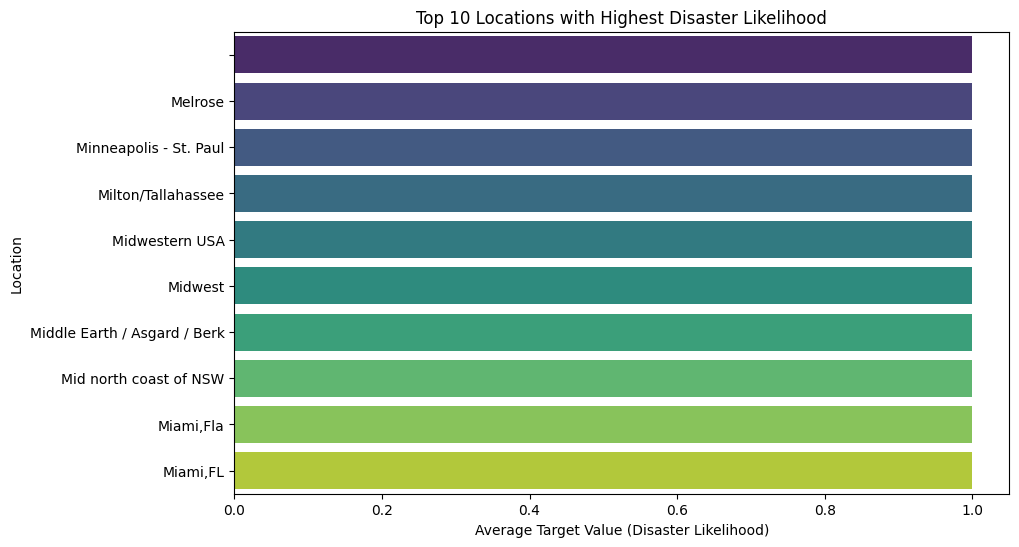

In [73]:
# Visualize top 10 locations associated with disasters
top_10_disaster_locations = location_target_mean.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_disaster_locations.values, y=top_10_disaster_locations.index, palette='viridis')
plt.title('Top 10 Locations with Highest Disaster Likelihood')
plt.xlabel('Average Target Value (Disaster Likelihood)')
plt.ylabel('Location')
plt.show()


In [74]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['location'].fillna('Unknown'), data['target'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the result
if p < 0.05:
    print("There is a significant relationship between 'location' and the target variable.")
else:
    print("There is no significant relationship between 'location' and the target variable.")


Chi-Square Statistic: 3530.169199218787
P-Value: 0.010949004723489609
There is a significant relationship between 'location' and the target variable.


In [75]:
data['location'].fillna('Unknown', inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_29872\883370311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['location'].fillna('Unknown', inplace=True)


In [76]:
data

,keyword,location,text,target
0,NaN,Unknown,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Unknown,Forest fire near La Ronge Sask. Canada,1
2,NaN,Unknown,All residents asked to 'shelter in place' are ...,1
3,NaN,Unknown,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,Unknown,Two giant cranes holding a bridge collapse int...,1
7609,NaN,Unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,Unknown,Police investigating after an e-bike collided ...,1


In [77]:
data['keyword'].value_counts().sum()

7552

In [78]:
keyword_disaster_relationship = data.groupby('keyword')['target'].mean().sort_values(ascending=False)
print(keyword_disaster_relationship.head())



keyword
debris         1.000000
wreckage       1.000000
derailment     1.000000
outbreak       0.975000
oil%20spill    0.973684
Name: target, dtype: float64


In [79]:
data['keyword'].fillna('Unknown', inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_29872\716332289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['keyword'].fillna('Unknown', inplace=True)


In [80]:
data

,keyword,location,text,target
0,Unknown,Unknown,Our Deeds are the Reason of this #earthquake M...,1
1,Unknown,Unknown,Forest fire near La Ronge Sask. Canada,1
2,Unknown,Unknown,All residents asked to 'shelter in place' are ...,1
3,Unknown,Unknown,"13,000 people receive #wildfires evacuation or...",1
4,Unknown,Unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,Unknown,Unknown,Two giant cranes holding a bridge collapse int...,1
7609,Unknown,Unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,Unknown,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Unknown,Unknown,Police investigating after an e-bike collided ...,1


Performing the vectorization

In [81]:
# vectorizing keyword by label encoding
encoder = LabelEncoder()

# Fit the encoder and transform the 'keyword' column
data['keyword'] = encoder.fit_transform(data['keyword'])

In [82]:
data['keyword'].value_counts()

keyword
0      61
105    45
64     42
9      42
178    41
       ..
116    19
95     12
195    11
135    10
161     9
Name: count, Length: 222, dtype: int64

In [83]:
data['location'].value_counts().sum()

7613

In [88]:
data['location'].value_counts()

location
Unknown                         2535
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3341, dtype: int64

In [89]:
# vectorizing location by label encoding
data['location'] = encoder.fit_transform(data['location'])

keyword  location  text                                                                                                                                          target
186      1860      #Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_  1         6
104      2671      11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...      1         6
94       2671      He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                   0         4
167      2671      VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...      1         4
82       2032      .POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.

In [ ]:
# TFiDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the vocabulary size
tweet_vectors = vectorizer.fit_transform(data['text']).toarray()

In [94]:
tweet_vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.33001572, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
text_df = pd.DataFrame(tweet_vectors, columns=[f'text_{i}' for i in range(tweet_vectors.shape[1])])

# Concatenate the transformed text data back with the original DataFrame (excluding 'text' column)
df = pd.concat([data.drop(columns=['text']), text_df], axis=1)


In [97]:
df

,keyword,location,target,text_0,text_1,text_2,text_3,text_4,text_5,text_6,...,text_4990,text_4991,text_4992,text_4993,text_4994,text_4995,text_4996,text_4997,text_4998,text_4999
0,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2671,1,0.0,0.465642,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0,2671,1,0.0,0.000000,0.330016,0.0,0.0,0.350237,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0,2671,1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting the X and Y

In [98]:
X = df.drop(columns=['target'])
Y = df['target']

In [99]:
print(X.shape)
print(Y.shape)

(7613, 5002)
(7613,)


Splitting the train test data

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
print(X_train.shape, X_test.shape, X.shape)

(6090, 5002) (1523, 5002) (7613, 5002)


Model implementation

In [104]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [105]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [107]:
rf_model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [111]:
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       874
           1       0.83      0.60      0.70       649

    accuracy                           0.78      1523
   macro avg       0.79      0.75      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [113]:
print('Accuracy:', accuracy_score(y_test, rf_model.predict(X_test)))

Accuracy: 0.7767564018384767


Kaggle test data prediction

In [114]:
kaggle_data = pd.read_csv('Datasets/test.csv')

In [115]:
kaggle_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [116]:
kaggle_data.drop(columns=['id'], inplace=True)

In [117]:
kaggle_data['location'].fillna('Unknown', inplace=True)
kaggle_data['keyword'].fillna('Unknown', inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_29872\3204748290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kaggle_data['location'].fillna('Unknown', inplace=True)
C:\Users\Musta\AppData\Local\Temp\ipykernel_29872\3204748290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [118]:
# vectorizing keyword by label encoding


# Fit the encoder and transform the 'keyword' column
kaggle_data['keyword'] = encoder.fit_transform(kaggle_data['keyword'])

In [120]:
# vectorizing location by label encoding
kaggle_data['location'] = encoder.fit_transform(kaggle_data['location'])

In [121]:
kaggle_data

,keyword,location,text
0,0,1300,Just happened a terrible car crash
1,0,1300,"Heard about #earthquake is different cities, s..."
2,0,1300,"there is a forest fire at spot pond, geese are..."
3,0,1300,Apocalypse lighting. #Spokane #wildfires
4,0,1300,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,0,1300,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,0,1300,Storm in RI worse than last hurricane. My city...
3260,0,1300,Green Line derailment in Chicago http://t.co/U...
3261,0,1300,MEG issues Hazardous Weather Outlook (HWO) htt...


In [122]:
kaggle_tweet_vectors = vectorizer.fit_transform(kaggle_data['text']).toarray()

In [123]:
kaggle_text_df = pd.DataFrame(kaggle_tweet_vectors, columns=[f'text_{i}' for i in range(tweet_vectors.shape[1])])

# Concatenate the transformed text data back with the original DataFrame (excluding 'text' column)
test_df = pd.concat([kaggle_data.drop(columns=['text']), kaggle_text_df], axis=1)


In [128]:
predictions = rf_model.predict(test_df)

In [136]:
print(accuracy_score(y_test, rf_model.predict(X_test)))

0.7767564018384767


Exporting it to csv file

In [126]:
sample = pd.read_csv('Datasets/test.csv')

In [134]:
Final_prediction = pd.DataFrame({
    'id': sample['id'],  # Align lengths
    'target': predictions
})



In [135]:
Final_prediction.to_csv('Datasets/submission.csv', index=False)